In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas_datareader as pdr



# Pre-process data

In [2]:
df=pd.read_csv('qct_data.csv')
df

指标名称  中间价:美元兑人民币:月:平均值  官方储备资产:外汇储备  出口金额:当月值  进口金额:当月值  出口金额:当月同比  \
0    2011/01          6.602700     29316.74   1506.97   1449.15      37.64   
1    2011/02          6.583133     29913.86    966.81   1045.54       2.35   
2    2011/03          6.566243     30446.74   1521.34   1523.24      35.76   
3    2011/04          6.529232     31458.43   1555.92   1443.70      29.82   
4    2011/05          6.498848     31659.97   1570.51   1441.22      19.28   
..       ...               ...          ...       ...       ...        ...   
133  2022/02          6.347044     32138.27   2174.09   1884.20       6.20   
134  2022/03          6.345722     31879.94   2755.62   2296.03      14.50   
135  2022/04          6.428016     31197.20   2732.57   2225.64       3.70   
136  2022/05          6.707126     31277.80   3077.24   2293.25      16.70   
137  2022/06          6.699129     30712.72   3312.64   2333.23      17.90   

     进口金额:当月同比          M2  M2:同比  CPI:当月同比  ...  baiduindex美元人民币汇率  \
0        51.70   733884.83   17.2     4.900  ...         379.193548   
1        20.00   736130.86   15.7     4.944  ...         342.357143   
2        27.50   758130.88   16.6     5.383  ...         428.870968   
3        21.89   757384.56   15.3     5.344  ...         405.900000   
4        28.44   763409.22   15.1     5.515  ...         413.677419   
..         ...         ...    ...       ...  ...                ...   
133      11.20  2441488.90    9.2     0.900  ...        2201.250000   
134       0.30  2497688.34    9.7     1.500  ...        2767.548387   
135       0.00  2499710.90   10.5     2.100  ...        2932.366667   
136       4.00  2527026.15   11.1     2.100  ...        4391.419355   
137       1.00  2581451.20   11.4     2.500  ...        3178.300000   

     baiduindex美元人民币汇率走势  baiduindex搜索数量平均值  谷歌指数：USDCNY  \
0              24.870968        1384.367742            9   
1              25.250000        1272.435714           10   
2              18.193548        1430.677419            6   
3              18.500000        1533.573333            5   
4              10.096774        1698.425806           10   
..                   ...                ...          ...   
133           113.714286        4316.457143           14   
134           120.903226        6222.070968           17   
135           125.900000        8366.566667           23   
136           223.935484       10192.270970           26   
137           139.266667        6265.226667           19   

     谷歌指数：Dollar RMB exchange rate  谷歌指数：RMB exchange rate  \
0                               47                      64   
1                               41                      53   
2                               83                      73   
3                               61                      72   
4                               66                      67   
..                             ...                     ...   
133                             14                      27   
134                             14                      30   
135                             12                      30   
136                             17                      37   
137                             17                      37   

     谷歌指数：rate of rmb to usd  谷歌指数：dollar to RMB  谷歌指数：dollar to yuan  \
0                         35                  28                   25   
1                         12                  21                   20   
2                         56                  29                   21   
3                          0                  32                   27   
4                         66                  33                   28   
..                       ...                 ...                  ...   
133                       53                  38                   35   
134                       39                  47                   56   
135                       29                  47                   46   
136                   

In [3]:
DATA=df.dropna()

#log scale the data

DATA['官方储备资产:外汇储备'] = np.log(DATA['官方储备资产:外汇储备'])
DATA['出口金额:当月值'] = np.log(DATA['出口金额:当月值'])

DATA['进口金额:当月值'] = np.log(DATA['进口金额:当月值'])
DATA['M2'] = np.log(DATA['M2'])
DATA['期货收盘价(连续):COMEX黄金:月:平均值'] = np.log(DATA['期货收盘价(连续):COMEX黄金:月:平均值'])
DATA['美国:道琼斯工业平均指数:月:平均值'] = np.log(DATA['美国:道琼斯工业平均指数:月:平均值'])
DATA['美国:纳斯达克综合指数:月:平均值'] = np.log(DATA['美国:纳斯达克综合指数:月:平均值'])
DATA['美国:M2'] = np.log(DATA['美国:M2'])
DATA['美国:标准普尔500指数:月:平均值'] = np.log(DATA['美国:标准普尔500指数:月:平均值'])
DATA['深交所:深证成指:月:平均值'] = np.log(DATA['深交所:深证成指:月:平均值'])
DATA['上证综合指数:月:平均值'] = np.log(DATA['上证综合指数:月:平均值'])
DATA['全球:经济政策不确定性指数:按GDP现价加权平均'] = np.log(DATA['全球:经济政策不确定性指数:按GDP现价加权平均'])
DATA['中国:经济政策不确定性指数:新闻指数'] = np.log(DATA['中国:经济政策不确定性指数:新闻指数'])
DATA['美国:经济政策不确定性指数:总指数'] = np.log(DATA['美国:经济政策不确定性指数:总指数'])
DATA['美国:经济政策不确定性指数:新闻指数'] = np.log(DATA['美国:经济政策不确定性指数:新闻指数'])
DATA['baiduindex人民币对美元汇率'] = np.log(DATA['baiduindex人民币对美元汇率'])
DATA['baiduindex人民币汇率'] = np.log(DATA['baiduindex人民币汇率'])
DATA['baiduindex人民币兑美元'] = np.log(DATA['baiduindex人民币兑美元'])
DATA['baiduindex美元人民币汇率'] = np.log(DATA['baiduindex美元人民币汇率'])
DATA['baiduindex搜索数量平均值'] = np.log(DATA['baiduindex搜索数量平均值'])

DATA
DATA.to_csv('all_variables.csv')

<ipython-input-3-45af2b94101a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['官方储备资产:外汇储备'] = np.log(DATA['官方储备资产:外汇储备'])
<ipython-input-3-45af2b94101a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA['出口金额:当月值'] = np.log(DATA['出口金额:当月值'])
<ipython-input-3-45af2b94101a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [4]:
LABEL = '中间价:美元兑人民币:月:平均值' # response variable
FEATURES = ('中间价:美元兑人民币:月:平均值','官方储备资产:外汇储备','出口金额:当月值','进口金额:当月值','M2','CPI:当月同比','美国:CPI:当月同比','工业增加值:当月同比','PPI:全部工业品:当月同比','PMI','美元指数:月:平均值','期货结算价(连续):WTI原油:月:平均值','期货收盘价(连续):COMEX黄金:月:平均值','美国:道琼斯工业平均指数:月:平均值','美国:纳斯达克综合指数:月:平均值','美国:M2','美国:标准普尔500指数:月:平均值','美国:标准普尔500波动率指数(VIX):月:平均值','美国:密歇根大学消费者信心指数','深交所:深证成指:月:平均值','上证综合指数:月:平均值','全球:经济政策不确定性指数:按GDP现价加权平均','中国:经济政策不确定性指数:新闻指数','美国:经济政策不确定性指数:总指数','美国:经济政策不确定性指数:新闻指数','CLI_china', 'CLI_US', 'CLI_global', 'baiduindex搜索数量平均值','谷歌指数平均值')[1:] # explanatory variables
FEATURES


('官方储备资产:外汇储备',
 '出口金额:当月值',
 '进口金额:当月值',
 'M2',
 'CPI:当月同比',
 '美国:CPI:当月同比',
 '工业增加值:当月同比',
 'PPI:全部工业品:当月同比',
 'PMI',
 '美元指数:月:平均值',
 '期货结算价(连续):WTI原油:月:平均值',
 '期货收盘价(连续):COMEX黄金:月:平均值',
 '美国:道琼斯工业平均指数:月:平均值',
 '美国:纳斯达克综合指数:月:平均值',
 '美国:M2',
 '美国:标准普尔500指数:月:平均值',
 '美国:标准普尔500波动率指数(VIX):月:平均值',
 '美国:密歇根大学消费者信心指数',
 '深交所:深证成指:月:平均值',
 '上证综合指数:月:平均值',
 '全球:经济政策不确定性指数:按GDP现价加权平均',
 '中国:经济政策不确定性指数:新闻指数',
 '美国:经济政策不确定性指数:总指数',
 '美国:经济政策不确定性指数:新闻指数',
 'CLI_china',
 'CLI_US',
 'CLI_global',
 'baiduindex搜索数量平均值',
 '谷歌指数平均值')

In [5]:
#DATA.loc[:, FEATURES] = scale(DATA.loc[:, FEATURES]) # standardizing indicators
#DATA.loc[:, FEATURES]

In [6]:
df_new=DATA.loc[:, FEATURES]
response=DATA.loc[:,LABEL]
df_new
len(FEATURES)

29

# Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(DATA.loc[:, FEATURES], DATA.loc[:, LABEL], shuffle=False, test_size=0.2)
X_test

官方储备资产:外汇储备  出口金额:当月值  进口金额:当月值         M2  CPI:当月同比  美国:CPI:当月同比  \
109    10.343907  6.689338  7.261028  14.523955       5.2          2.3   
110    10.328962  7.520625  7.406122  14.548322       4.3          1.5   
111    10.338984  7.598314  7.343083  14.554364       3.3          0.3   
112    10.342288  7.632537  7.278015  14.557535       2.4          0.1   
113    10.345711  7.663159  7.427543  14.573953       2.5          0.6   
114    10.359136  7.769966  7.476076  14.569498       2.7          1.0   
115    10.362370  7.759499  7.480270  14.574837       2.4          1.3   
116    10.355379  7.777428  7.617115  14.587508       1.7          1.4   
117    10.350728  7.767391  7.489457  14.580848       0.5          1.2   
118    10.366747  7.889504  7.563528  14.591160      -0.5          1.2   
119    10.378641  7.943385  7.629966  14.597948       0.2          1.4   
120    10.376820  7.877124  7.610729  14.609881      -0.3          1.4   
121    10.375051  7.623818  7.434724  14.620213      -0.2          1.7   
122    10.364081  7.786274  7.736311  14.638145       0.4          2.6   
123    10.372922  7.876354  7.708069  14.631807       0.9          4.2   
124    10.380282  7.877063  7.698192  14.637727       1.3          5.0   
125    10.377860  7.940990  7.744877  14.656124       1.1          5.4   
126    10.384644  7.945431  7.725211  14.649356       1.0          5.4   
127    10.383477  7.985934  7.761042  14.653739       0.8          5.3   
128    10.373687  8.023736  7.771501  14.666870       0.7          5.4   
129    10.378980  8.004947  7.672190  14.664019       1.5          6.2   
130    10.380462  8.085727  7.836346  14.672481       2.3          6.8   
131    10.389046  8.132169  7.809870  14.683829       1.5          7.0   
132    10.380228  8.092741  7.798154  14.703823       0.9          7.5   
133    10.377803  7.684365  7.541259  14.708119       0.9          7.9   
134    10.369732  7.921398  7.738937  14.730876       1.5          8.5   
135    10.348084  7.912998  7.707800  14.731686       2.1          8.3   
136    10.350664  8.031788  7.737725  14.742554       2.1          8.6   

     工业增加值:当月同比  PPI:全部工业品:当月同比   PMI  美元指数:月:平均值  ...  上证综合指数:月:平均值  \
109  -25.867052            -0.4  35.7   98.877460  ...      7.981909   
110   -1.100000            -1.5  52.0   98.789655  ...      7.955798   
111    3.900000            -3.1  50.8   99.866591  ...      7.942402   
112    4.400000            -3.7  50.6   99.587319  ...      7.961051   
113    4.800000            -3.0  50.9   97.096186  ...      7.986416   
114    4.800000            -2.4  51.1   95.592983  ...      8.098286   
115    5.600000            -2.0  51.0   93.033129  ...      8.123918   
116    6.900000            -2.1  51.5   93.408764  ...      8.098297   
117    6.900000            -2.1  51.4   93.405914  ...      8.102205   
118    7.000000            -1.5  52.1   92.604662  ...      8.115367   
119    7.300000            -0.4  51.9   90.480213  ...      8.131448   
120   25.398571             0.3  51.3   90.241765  ...      8.179320   
121   52.339181             1.7  50.6   90.629355  ...      8.182262   
122   14.100000             4.4  51.9   92.035513  ...      8.144092   
123    9.800000             6.8  51.1   91.638386  ...      8.147145   
124    8.800000             9.0  51.0   90.306252  ...      8.163068   
125    8.300000             8.8  50.9   91.057341  ...      8.181959   
126    6.400000             9.0  50.4   92.510541  ...      8.164474   
127    5.300000             9.5  50.1   92.806050  ...      8.158996   
128    3.100000            10.7  49.6   92.975636  ...      8.196220   
129    3.500000            13.5  49.2   93.960176  ...      8.181449   
130    3.800000            12.9  50.1   95.326768  ...      8.171488   
131    4.300000            10.3  50.3   96.207952  ...      8.196172   
132    3.857957             9.1  50.1   95.938267  ...      8.170155   
133   12.795905             8.8  50.2   96.005875  ...    

# Initial Data collection

In [8]:
import statistics

data=X_train['谷歌指数平均值']
X_ols = sm.add_constant(data)
statsmodel = sm.OLS(y_train, X_ols).fit()

print(statistics.mean(data))
print(statistics.stdev(data))
print(statsmodel.summary())




42.068807339908254
11.09756607272714
                            OLS Regression Results                            
Dep. Variable:       中间价:美元兑人民币:月:平均值   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.142
Method:                 Least Squares   F-statistic:                     18.91
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           3.13e-05
Time:                        12:30:59   Log-Likelihood:                -9.0348
No. Observations:                 109   AIC:                             22.07
Df Residuals:                     107   BIC:                             27.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

(array([13., 28., 30., 22.,  6.,  1.,  3.,  2.,  1.,  3.]),
 array([26.16666667, 31.88333334, 37.6       , 43.31666667, 49.03333333,
        54.75      , 60.46666667, 66.18333333, 71.9       , 77.61666666,
        83.33333333]),
 <BarContainer object of 10 artists>)

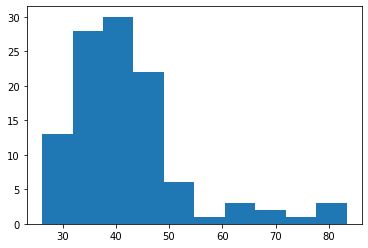

In [9]:
plt.hist(data, bins=10)

# LASSO selection

In [10]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_diabetes




In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model' ,Lasso())
])
  
search=GridSearchCV(pipeline,
                               {'model__alpha':np.arange(0,10,0.04)},
                               cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=3
                   
                               )

search.fit(X_train,y_train)



Fitting 5 folds for each of 250 candidates, totalling 1250 fits
[CV 1/5] END .................model__alpha=0.0;, score=-0.093 total time=   0.0s
[CV 2/5] END .................model__alpha=0.0;, score=-0.019 total time=   0.0s
[CV 3/5] END .................model__alpha=0.0;, score=-0.076 total time=   0.0s
[CV 4/5] END .................model__alpha=0.0;, score=-0.108 total time=   0.0s
[CV 5/5] END .................model__alpha=0.0;, score=-0.262 total time=   0.0s
[CV 1/5] END ................model__alpha=0.04;, score=-0.030 total time=   0.0s
[CV 2/5] END ................model__alpha=0.04;, score=-0.010 total time=   0.0s
[CV 3/5] END ................model__alpha=0.04;, score=-0.064 total time=   0.0s
[CV 4/5] END ................model__alpha=0.04;, score=-0.084 total time=   0.0s
[CV 5/5] END ................model__alpha=0.04;, score=-0.106 total time=   0.0s
[CV 1/5] END ................model__alpha=0.08;, score=-0.024 total time=   0.0s
[CV 2/5] END ................model__alpha=0.0

/opt/anaconda3/lib/python3.8/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.885e-02, tolerance: 8.467e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.

[CV 4/5] END .................model__alpha=0.2;, score=-0.126 total time=   0.0s
[CV 5/5] END .................model__alpha=0.2;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=0.24;, score=-0.021 total time=   0.0s
[CV 2/5] END ................model__alpha=0.24;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=0.24;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=0.24;, score=-0.104 total time=   0.0s
[CV 5/5] END ................model__alpha=0.24;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=0.28;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=0.28;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=0.28;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=0.28;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=0.28;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END ................model__alpha=1.24;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.24;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=1.28;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.28;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=1.28;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=1.28;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.28;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=1.32;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=1.32;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=1.32;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=1.32;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=1.32;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ................model__alpha=2.12;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=2.12;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=2.12;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=2.12;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=2.16;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=2.16;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=2.16;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=2.16;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=2.16;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=2.2;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=2.2;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=2.2;, score=-0.082 total time=   0.0s
[CV 4/5] END ...............

[CV 3/5] END ................model__alpha=2.96;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=2.96;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=2.96;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=3.0;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=3.0;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=3.0;, score=-0.082 total time=   0.0s
[CV 4/5] END .................model__alpha=3.0;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=3.0;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=3.04;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=3.04;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=3.04;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.04;, score=-0.102 total time=   0.0s
[CV 5/5] END ...............

[CV 3/5] END ................model__alpha=3.84;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.84;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=3.84;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=3.88;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=3.88;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=3.88;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.88;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=3.88;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=3.92;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=3.92;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=3.92;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=3.92;, score=-0.102 total time=   0.0s
[CV 5/5] END ...............

[CV 4/5] END ................model__alpha=4.72;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=4.72;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=4.76;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=4.76;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=4.76;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=4.76;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=4.76;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=4.8;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=4.8;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=4.8;, score=-0.082 total time=   0.0s
[CV 4/5] END .................model__alpha=4.8;, score=-0.102 total time=   0.0s
[CV 5/5] END .................model__alpha=4.8;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 4/5] END ................model__alpha=5.64;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=5.64;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=5.68;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=5.68;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=5.68;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=5.68;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=5.68;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=5.72;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=5.72;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=5.72;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=5.72;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=5.72;, score=-0.236 total time=   0.0s
[CV 1/5] END ...............

[CV 2/5] END ..model__alpha=6.5600000000000005;, score=-0.136 total time=   0.0s
[CV 3/5] END ..model__alpha=6.5600000000000005;, score=-0.082 total time=   0.0s
[CV 4/5] END ..model__alpha=6.5600000000000005;, score=-0.102 total time=   0.0s
[CV 5/5] END ..model__alpha=6.5600000000000005;, score=-0.236 total time=   0.0s
[CV 1/5] END ..model__alpha=6.6000000000000005;, score=-0.020 total time=   0.0s
[CV 2/5] END ..model__alpha=6.6000000000000005;, score=-0.136 total time=   0.0s
[CV 3/5] END ..model__alpha=6.6000000000000005;, score=-0.082 total time=   0.0s
[CV 4/5] END ..model__alpha=6.6000000000000005;, score=-0.102 total time=   0.0s
[CV 5/5] END ..model__alpha=6.6000000000000005;, score=-0.236 total time=   0.0s
[CV 1/5] END ...model__alpha=6.640000000000001;, score=-0.020 total time=   0.0s
[CV 2/5] END ...model__alpha=6.640000000000001;, score=-0.136 total time=   0.0s
[CV 3/5] END ...model__alpha=6.640000000000001;, score=-0.082 total time=   0.0s
[CV 4/5] END ...model__alpha

[CV 2/5] END ................model__alpha=7.44;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=7.44;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=7.44;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=7.44;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=7.48;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=7.48;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=7.48;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=7.48;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=7.48;, score=-0.236 total time=   0.0s
[CV 1/5] END ..model__alpha=7.5200000000000005;, score=-0.020 total time=   0.0s
[CV 2/5] END ..model__alpha=7.5200000000000005;, score=-0.136 total time=   0.0s
[CV 3/5] END ..model__alpha=7.5200000000000005;, score=-0.082 total time=   0.0s
[CV 4/5] END ..model__alpha=

[CV 2/5] END ................model__alpha=8.32;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=8.32;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=8.32;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=8.32;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=8.36;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=8.36;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=8.36;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=8.36;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=8.36;, score=-0.236 total time=   0.0s
[CV 1/5] END .................model__alpha=8.4;, score=-0.020 total time=   0.0s
[CV 2/5] END .................model__alpha=8.4;, score=-0.136 total time=   0.0s
[CV 3/5] END .................model__alpha=8.4;, score=-0.082 total time=   0.0s
[CV 4/5] END ...............

[CV 1/5] END ................model__alpha=9.24;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=9.24;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=9.24;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=9.24;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=9.24;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=9.28;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=9.28;, score=-0.136 total time=   0.0s
[CV 3/5] END ................model__alpha=9.28;, score=-0.082 total time=   0.0s
[CV 4/5] END ................model__alpha=9.28;, score=-0.102 total time=   0.0s
[CV 5/5] END ................model__alpha=9.28;, score=-0.236 total time=   0.0s
[CV 1/5] END ................model__alpha=9.32;, score=-0.020 total time=   0.0s
[CV 2/5] END ................model__alpha=9.32;, score=-0.136 total time=   0.0s
[CV 3/5] END ...............

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
       1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
       1.76, 1.8 , 1.84, 1...
       7.04, 7.08, 7.12, 7.16, 7.2 , 7.24, 7.28, 7.32, 7.36, 7.4 , 7.44,
       7.48, 7.52, 7.56, 7.6 , 7.64, 7.68, 7.72, 7.76, 7.8 , 7.84, 7.88,
       7.92, 7.96, 8.  , 8.04, 8.08, 8.12, 8.16, 8.2 , 8.24, 8.28, 8.32,
       8.36, 8.4 , 8.44, 8.48, 8.52, 8.56, 8.6 , 8.64, 8.68, 8.72, 8.76,
       8.8 , 8.84, 8.88, 8.92, 8.96, 9.  , 9.04, 9.08, 9.12, 9.16, 9.2 ,
       9.24, 9.28, 9.32, 9.36, 9.4 , 9.44, 9.48, 9.52, 9.56, 9.6 , 9.64,
       9.68, 9.72, 9.76, 9.8 , 9.84, 9.88, 9.92, 9.96])},
             scoring='neg_mean_squared_error', verbose=3)

In [12]:
search.best_params_
coef=search.best_estimator_[1].coef_
a=np.array(FEATURES)[coef != 0]
a

array(['官方储备资产:外汇储备', '美元指数:月:平均值', '美国:标准普尔500指数:月:平均值',
       '全球:经济政策不确定性指数:按GDP现价加权平均', '中国:经济政策不确定性指数:新闻指数', 'CLI_US',
       'baiduindex搜索数量平均值'], dtype='<U26')

In [13]:
name=('FRA', 'EX', 'IM', 'M2','CPI','CPI_US','IVA','PPI','PMI','DXY','WTI','COMEX','DJIA','NASDAQ','AM2','S&P','VIX','UMCSI','SZCOMP','SHCOMP','GEPU','CEPU','AEPU','AEPU-NI','CLI_China','CLI_US','CLI_Global','BI','GT')

coef_df = pd.DataFrame({'coef': coef,
                        'varname': name
                       })

<ipython-input-14-08568b842082>:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


(array([-0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,  0.   ,  0.025,
         0.05 ,  0.075]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

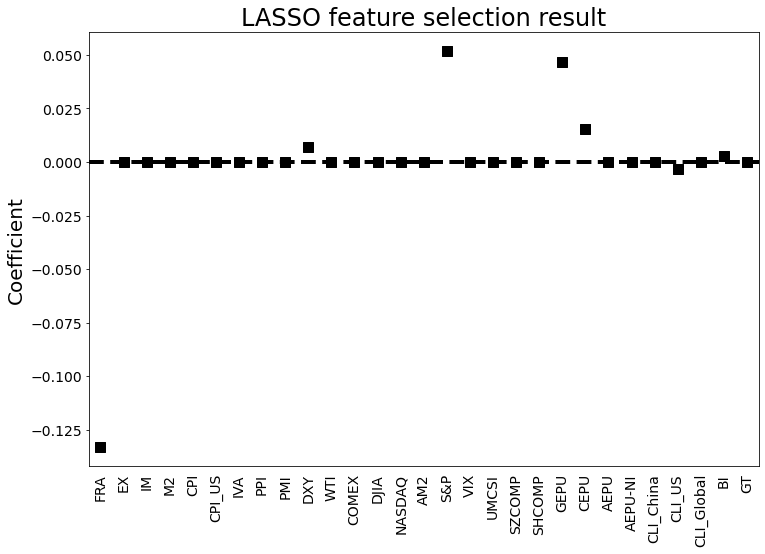

In [14]:
fig, ax = plt.subplots(figsize=(12, 8))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_ylabel('Coefficient', fontsize = 20)
ax.set_xlabel('')
plt.title("LASSO feature selection result", fontsize=24)
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['FRA', 'EX', 'IM', 'M2','CPI','CPI_US','IVA','PPI','PMI','DXY','WTI','COMEX','DJIA','NASDAQ','AM2','S&P','VIX','UMCSI','SZCOMP','SHCOMP','GEPU','CEPU','AEPU','AEPU-NI','CLI_China','CLI_US','CLI_Global','BI','GT'], 
                       rotation=90, fontsize=14)
plt.yticks(fontsize=14)

# Update features

# Train test split again

In [58]:
LF = ('中间价:美元兑人民币:月:平均值','官方储备资产:外汇储备', '美元指数:月:平均值', '美国:标准普尔500指数:月:平均值','全球:经济政策不确定性指数:按GDP现价加权平均', '中国:经济政策不确定性指数:新闻指数','baiduindex搜索数量平均值')
df_raw=DATA.loc[:, LF]
df_raw

中间价:美元兑人民币:月:平均值  官方储备资产:外汇储备  美元指数:月:平均值  美国:标准普尔500指数:月:平均值  \
0            6.602700    10.285914   79.136667            7.156659   
1            6.583133    10.306077   77.762000            7.186234   
2            6.566243    10.323734   76.260000            7.173564   
3            6.529232    10.356422   74.691429            7.194065   
4            6.498848    10.362808   74.933182            7.199163   
..                ...          ...         ...                 ...   
132          6.358847    10.380228   95.938267            8.428103   
133          6.347044    10.377803   96.005875            8.397504   
134          6.345722    10.369732   98.463757            8.387373   
135          6.428016    10.348084  100.689371            8.387380   
136          6.707126    10.350664  103.084923            8.304089   

     全球:经济政策不确定性指数:按GDP现价加权平均  中国:经济政策不确定性指数:新闻指数  baiduindex搜索数量平均值  
0                    4.702427            5.151443           7.232999  
1                    4.534989            3.830435           7.148688  
2                    4.836210            4.877091           7.265903  
3                    4.742122            5.030511           7.335356  
4                    4.485622            3.263623           7.437457  
..                        ...                 ...                ...  
132                  5.449804            6.367468           8.118476  
133                  5.243335            6.006791           8.370190  
134                  5.801087            6.761499           8.735858  
135                  5.675489            6.738056           9.031999  
136                  5.676240            6.601004           9.229385  

[137 rows x 7 columns]

# Models

In [92]:
import pandas as pd
import numpy as np
print('Result before 2015 exchange rate change')

df = pd.read_csv('all_variables.csv')
values=np.arange(56,137,1)
df = df[df.index.isin(values) == False]

df = df.drop('Unnamed: 0',axis=1)
df = df.drop('指标名称',axis=1)
import warnings
warnings.filterwarnings('ignore')

all_data = np.array(df)

row = 0.2*(all_data.shape[0])
x_train_initial = all_data[:-int(row), 1:]
x_test_initial = all_data[-int(row):, 1:]

y_train_initial = all_data[:-int(row), 0]
y_test_initial = all_data[-int(row):, 0]

from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))


#Models
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#Model 2: ELM
from hpelm import ELM

elm=ELM(44, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"

#Model 3: SLTM

import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(44,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(44,1))))
#model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#Model 5: KELM
from sys import path

path.append(".") 

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf", gamma=0.001)
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_kelm = MAE(y_test_rel,y_kelm_pre)
rmse_kelm = RMSE(y_test_rel,y_kelm_pre)
mape_kelm = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_kelm)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_kelm)) #"RMSE:"
svr1=y_svr_pre
elm1=y_elm_pre
kelm1=y_kelm_pre
lstm1=y_lstm_pre
bilstm1=y_bilstm_pre

Result before 2015 exchange rate change
svr的MAE为：0.06175415962699813
svr的RMSE为：0.10854054046462037
elm的MAE为：0.07718591239025165
elm的RMSE为：0.12860010510185532
1/1 [==============================] - 0s 433ms/step
LSTM的MAE为：0.13977833609166365
LSTM的RMSE为：0.14294106360862074
1/1 [==============================] - 1s 562ms/step
BiLSTM的MAE为：0.04663432069333724
BiLSTM的RMSE为：0.049824657164535574
KELM的MAE为：0.05298589272727241
KELM的RMSE为：0.06077531320140687


In [93]:
import pandas as pd
import numpy as np

print('Results after 2015 exchange rate change')

df = pd.read_csv('all_variables.csv')
values=np.arange(1,55,1)
df = df[df.index.isin(values) == False]

df = df.drop('Unnamed: 0',axis=1)
df = df.drop('指标名称',axis=1)
import warnings
warnings.filterwarnings('ignore')

all_data = np.array(df)

row = 0.2*(all_data.shape[0])
x_train_initial = all_data[:-int(row), 1:]
x_test_initial = all_data[-int(row):, 1:]

y_train_initial = all_data[:-int(row), 0]
y_test_initial = all_data[-int(row):, 0]
# 归一化
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#Models
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#Model 2: ELM
from hpelm import ELM

elm=ELM(44, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"

#Model 3: LSTM
import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(44,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#Model 4: BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(200,input_shape=(44,1))))
#model.add(Dropout(0.05))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#Model 5: KELM
from sys import path

path.append(".")

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf", gamma=0.001)
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_kelm_pre)
rmse_svr = RMSE(y_test_rel,y_kelm_pre)
mape_svr = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_svr)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_svr)) #"RMSE:"
svr1=y_svr_pre
elm1=y_elm_pre
kelm1=y_kelm_pre
lstm1=y_lstm_pre
bilstm1=y_bilstm_pre

Results after 2015 exchange rate change
svr的MAE为：0.128158581105849
svr的RMSE为：0.1552896653358556
elm的MAE为：0.35435027506901445
elm的RMSE为：0.36607074942187
1/1 [==============================] - 0s 327ms/step
LSTM的MAE为：0.3008836244494934
LSTM的RMSE为：0.31220532094118736
1/1 [==============================] - 1s 1s/step
BiLSTM的MAE为：0.10722240365171815
BiLSTM的RMSE为：0.11593608585367894
KELM的MAE为：0.39503324206250007
KELM的RMSE为：0.40432450327151387


In [89]:
print('LASSO result before 2015')

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

sequence_length = 6
horizon = 1

values=np.arange(56,137,1)
df = df_raw[df_raw.index.isin(values) == False]

data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))

all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)
#split data
row = round(0.2 * int(data.shape[0]))
#creating training data
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]



from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#ELM
from hpelm import ELM

elm=ELM(6, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"

#LSTM
import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(6,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(6,1))))
model.add(Dropout(0))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#KELM
from sys import path

path.append(".")

kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf", gamma=0.001)
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_kelm_pre)
rmse_svr = RMSE(y_test_rel,y_kelm_pre)
mape_svr = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_svr)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_svr)) #"RMSE:"

LASSO result before 2015
svr的MAE为：0.06297381477351394
svr的RMSE为：0.06635138672463309
elm的MAE为：0.05831998135350893
elm的RMSE为：0.06344211717235544
1/1 [==============================] - 0s 409ms/step
LSTM的MAE为：0.05866725176049799
LSTM的RMSE为：0.06372256798920323
1/1 [==============================] - 1s 674ms/step
BiLSTM的MAE为：0.026420094126109624
BiLSTM的RMSE为：0.0563861673695988
KELM的MAE为：0.05075764981818151
KELM的RMSE为：0.058203882373804125


In [90]:
print('LASSO result after 2015')

import pandas as pd
import numpy as np
#df = pd.read_csv('filtered_data.csv', index_col=0)

import warnings
warnings.filterwarnings('ignore')
sequence_length = 6
horizon = 1

values=np.arange(1,55,1)
df = df_raw[df_raw.index.isin(values) == False]

data = np.array(df.iloc[:,0]).reshape([-1,1])

all_data = []
for dta in range(len(data) - sequence_length-horizon+1):
    all_data.append(data[dta: dta + sequence_length])

all_data = np.array(all_data)
all_data = all_data.reshape(all_data.shape[0],all_data.shape[1])
ydata = data[horizon+sequence_length-1:]
ydata = pd.DataFrame(list(ydata))
#ydata = list(ydata)
all_data = pd.DataFrame(all_data)
all_data["y"] = ydata
all_data = np.array(all_data)
#split data
row = round(0.2 * int(data.shape[0]))
#creating training data
x_train_initial = all_data[:-int(row), :-1]
x_test_initial = all_data[-int(row):, :-1]
y_train_initial = all_data[:-int(row), -1]
y_test_initial = all_data[-int(row):, -1]


#%% 数据划分
from sklearn.preprocessing import StandardScaler,MinMaxScaler
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

x_scaled = x_scaler.fit(x_train_initial)
x_train = x_scaler.transform(x_train_initial)
x_test = x_scaler.transform(x_test_initial)

y_scaler = y_scaler.fit(y_train_initial.reshape(-1,1))
y_train = y_scaler.transform(y_train_initial.reshape(-1,1))
y_test = y_scaler.transform(y_test_initial.reshape(-1,1))

#Models
#Model 1: SVR
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='poly')
svr.fit(x_train, y_train.ravel())

y_pre = svr.predict(x_test)
y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_svr_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_svr_pre)
rmse_svr = RMSE(y_test_rel,y_svr_pre)
mape_svr = MAPE(y_test_rel,y_svr_pre)
print('svr的MAE为：'+str(mae_svr)) #"MAE:"
print('svr的RMSE为：'+str(rmse_svr)) #"RMSE:"

#ELM
from hpelm import ELM

elm=ELM(6, 1)
elm.add_neurons(1, "sigm")
elm.add_neurons(1, "rbf_l2")
elm.train(x_train, y_train, "LOO")
y_pre = elm.predict(x_test)


y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_elm_pre = y_test_pre
mae_elm = MAE(y_test_rel,y_elm_pre)
rmse_elm = RMSE(y_test_rel,y_elm_pre)
mape_elm = MAPE(y_test_rel,y_elm_pre)
print('elm的MAE为：'+str(mae_elm)) #"MAE:"
print('elm的RMSE为：'+str(rmse_elm)) #"RMSE:"

#Model 3: LSTM

import os
import random
import tensorflow as tf

np.random.seed(1000)

os.environ['PYTHONHASHSEED'] = '0'
random.seed(1000)
tf.random.set_seed(1000)

amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import LSTM,Dense,Dropout
from keras.models import Sequential
verbose = 0
model = Sequential()
model.add(LSTM(12,input_shape=(6,1)))
#model.add(LSTM(12))#,return_sequences=True
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_lstm_pre = y_test_pre
mae_lstm = MAE(y_test_rel,y_lstm_pre)
rmse_lstm = RMSE(y_test_rel,y_lstm_pre)
mape_lstm = MAPE(y_test_rel,y_lstm_pre)
print('LSTM的MAE为：'+str(mae_lstm)) #"MAE:"
print('LSTM的RMSE为：'+str(rmse_lstm)) #"RMSE:"

#BiLSTM
amount_of_features = 1
x_train1 = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
x_test1 = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))
#
from keras.layers import Bidirectional
verbose = 0
model = Sequential()
model.add(Bidirectional(LSTM(16,input_shape=(6,1))))
model.add(Dropout(0))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x_train1,y_train,epochs=100+100,validation_split=0,verbose=0)
y_pre = model.predict(x_test1)

y_pre = y_pre.reshape(-1,1)
y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)

y_bilstm_pre = y_test_pre
mae_bilstm = MAE(y_test_rel,y_bilstm_pre)
rmse_bilstm = RMSE(y_test_rel,y_bilstm_pre)
mape_bilstm = MAPE(y_test_rel,y_bilstm_pre)
print('BiLSTM的MAE为：'+str(mae_bilstm)) #"MAE:"
print('BiLSTM的RMSE为：'+str(rmse_bilstm)) #"RMSE:"

#KELM
from sys import path
path.append('.')
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

kelmor = KELMOR(C=2, kernel="rbf", gamma=0.001)
kelmor.fit(x_train,y_train)

y_pre = kelmor.predict(x_test)

y_pre = y_pre.reshape(-1,1)

y_test_pre = y_scaler.inverse_transform(y_pre)
y_test_pre = y_test_pre.reshape(-1,1)
y_test_rel = y_test_initial

y_kelm_pre = y_test_pre
from accuracy import RMSE,MAE,MAPE
mae_svr = MAE(y_test_rel,y_kelm_pre)
rmse_svr = RMSE(y_test_rel,y_kelm_pre)
mape_svr = MAPE(y_test_rel,y_kelm_pre)
print('KELM的MAE为：'+str(mae_svr)) #"MAE:"
print('KELM的RMSE为：'+str(rmse_svr)) #"RMSE:"
#print('KELM的MAPE为：'+str(mape_svr))

LASSO result after 2015
svr的MAE为：0.12071891234962606
svr的RMSE为：0.13851874157255406
elm的MAE为：0.29911459208028157
elm的RMSE为：0.31125317977640604
1/1 [==============================] - 0s 337ms/step
LSTM的MAE为：0.20529091069973576
LSTM的RMSE为：0.21133663985674556
1/1 [==============================] - 1s 799ms/step
BiLSTM的MAE为：0.07512317796987013
BiLSTM的RMSE为：0.09361650265965205
KELM的MAE为：0.2620072529411767
KELM的RMSE为：0.2749062660569151


In [91]:
test = pd.read_csv('all_variables.csv')
a=test[test.指标名称 == '2015/08']
a

Unnamed: 0     指标名称  中间价:美元兑人民币:月:平均值  官方储备资产:外汇储备  出口金额:当月值  进口金额:当月值  \
55          55  2015/08          6.305576    10.479365  7.581523  7.218713   

    出口金额:当月同比  进口金额:当月同比         M2  M2:同比  ...  baiduindex美元人民币汇率  \
55      -5.84     -13.87  14.120719   13.3  ...           7.152749   

    baiduindex美元人民币汇率走势  baiduindex搜索数量平均值  谷歌指数：USDCNY  \
55           127.225807           9.432005           46   

    谷歌指数：Dollar RMB exchange rate  谷歌指数：RMB exchange rate  \
55                             81                     100   

    谷歌指数：rate of rmb to usd  谷歌指数：dollar to RMB  谷歌指数：dollar to yuan  \
55                       74                  69                  100   

      谷歌指数平均值  
55  78.333333  

[1 rows x 47 columns]